In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
import pandas as pd
import numpy as np

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
n_train = mnist.train.num_examples 
n_validation = mnist.validation.num_examples  
n_test = mnist.test.num_examples  

In [0]:
n_input = 784 
#according to problem statement
n_hidden1 = 1000  
n_hidden2 = 1000
n_hidden3 = 500
n_hidden4 = 200
n_output = 10  # 0-9 

In [0]:
k =np.arange(0,100,2)
#k=[0,5,10,20,25,30,35,40,45,50,55,60,65,70,75,80,90,92,95,97,99]

In [0]:
#parameters
learning_rate = 0.00001
n_iterations = 5000
batch_size = 128
dropout = 0.5

In [0]:
#place holder variables
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)

In [0]:
a = tf.Variable(tf.truncated_normal([n_input, n_hidden1]))
b = tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2]))
c = tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3]))
d = tf.Variable(tf.truncated_normal([n_hidden3, n_hidden4]))
e = tf.Variable(tf.truncated_normal([n_hidden4, n_output]))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
weights = {
    'w1': a,
    'w2': b,
    'w3': c,
    'w4': d,
    'out': e
}

In [0]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'b4': tf.Variable(tf.constant(0.1, shape=[n_hidden4])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [0]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_1 = tf.nn.relu(layer_1)
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_2 = tf.nn.relu(layer_2)
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_3 = tf.nn.relu(layer_3)
layer_4 = tf.add(tf.matmul(layer_3,weights['w4']),biases['b4'])
layer_4 = tf.nn.relu(layer_4)
layer_drop = tf.nn.dropout(layer_4, keep_prob)
output_layer = tf.matmul(layer_4, weights['out']) + biases['out']

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy],feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
        print("Iteration",str(i),"\t| Loss =",str(minibatch_loss),"\t| Accuracy =",str(minibatch_accuracy))

Iteration 0 	| Loss = 808477.4 	| Accuracy = 0.1171875
Iteration 100 	| Loss = 102465.81 	| Accuracy = 0.375
Iteration 200 	| Loss = 90641.57 	| Accuracy = 0.53125
Iteration 300 	| Loss = 47027.867 	| Accuracy = 0.609375
Iteration 400 	| Loss = 21275.262 	| Accuracy = 0.7890625
Iteration 500 	| Loss = 21385.146 	| Accuracy = 0.7890625
Iteration 600 	| Loss = 29992.836 	| Accuracy = 0.7734375
Iteration 700 	| Loss = 29733.611 	| Accuracy = 0.78125
Iteration 800 	| Loss = 16531.465 	| Accuracy = 0.859375
Iteration 900 	| Loss = 16161.283 	| Accuracy = 0.8359375
Iteration 1000 	| Loss = 17706.85 	| Accuracy = 0.8203125
Iteration 1100 	| Loss = 15889.618 	| Accuracy = 0.7890625
Iteration 1200 	| Loss = 12616.734 	| Accuracy = 0.84375
Iteration 1300 	| Loss = 11027.944 	| Accuracy = 0.8828125
Iteration 1400 	| Loss = 10744.167 	| Accuracy = 0.8671875
Iteration 1500 	| Loss = 16389.664 	| Accuracy = 0.828125
Iteration 1600 	| Loss = 10838.636 	| Accuracy = 0.8515625
Iteration 1700 	| Loss = 

In [0]:
#save the model
saver = tf.train.Saver()
save_path = saver.save(sess, "/tmp/model.ckpt")

In [0]:
  saver.restore(sess, "/tmp/model.ckpt")


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


In [0]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9127


In [0]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'Variable:0' shape=(784, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1000, 1000) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(1000, 500) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(500, 200) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(200, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(1000,) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(500,) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(10,) dtype=float32_ref>]

In [0]:
def get_indices_of_k_smallest(arr, k):
    idx = np.argpartition(arr.ravel(), k)
    return np.array(np.unravel_index(idx, arr.shape))[:, range(k)].transpose().tolist()

## Weight pruning


Loop from here

In [0]:
plt_var = np.zeros(len(k))
for p in range(len(k)):
  saver.restore(sess, "/tmp/model.ckpt")
  var1 = [v for v in tf.trainable_variables() if v.name == "Variable:0"]
  var2 = [v for v in tf.trainable_variables() if v.name == "Variable_1:0"]
  var3 = [v for v in tf.trainable_variables() if v.name == "Variable_2:0"]
  var4 = [v for v in tf.trainable_variables() if v.name == "Variable_3:0"]
  l=sess.run(var1)
  l = np.array(l)
  l =l.reshape(784,1000)
  m=sess.run(var2)
  m = np.array(m)
  m =m.reshape(1000,1000)
  n=sess.run(var3)
  n = np.array(n)
  n =n.reshape(1000,500)
  o=sess.run(var4)
  o = np.array(o)
  o =o.reshape(500,200)
  w = get_indices_of_k_smallest(l,int(1000*k[p]/100))
  x = get_indices_of_k_smallest(m,int(1000*k[p]/100))
  y = get_indices_of_k_smallest(n,int(500*k[p]/100))
  z = get_indices_of_k_smallest(o,int(200*k[p]/100))
  for _ in w:
    l[_[0]][_[1]]=0
  for _ in x:
    m[_[0]][_[1]]=0
  for _ in y:
    n[_[0]][_[1]]=0
  for _ in z:
    o[_[0]][_[1]]=0
  sess.run(a.assign(l))
  sess.run(b.assign(m))
  sess.run(c.assign(n))
  sess.run(d.assign(o))

  test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
  print("\nAccuracy on test set:", test_accuracy)  
  plt_var[p] = test_accuracy

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9127
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9115
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9104
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9087
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9082
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9076
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9067
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9057
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9054
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9046
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9028
INFO:tensorflow:Restoring parame

END LOOP

## unit pruning

In [0]:
unit_prune_plot_var = np.zeros(len(k))
for p in range(len(k)):
  saver.restore(sess, "/tmp/model.ckpt")

  var1 = [v for v in tf.trainable_variables() if v.name == "Variable_1:0"]
  var2 = [v for v in tf.trainable_variables() if v.name == "Variable_2:0"]
  var3 = [v for v in tf.trainable_variables() if v.name == "Variable_3:0"]
  var4 = [v for v in tf.trainable_variables() if v.name == "Variable_4:0"]
  l=sess.run(var1)
  l = np.array(l)
  l =l.reshape(1000,1000)
  m=sess.run(var2)
  m = np.array(m)
  m =m.reshape(1000,500)
  n=sess.run(var3)
  n = np.array(n)
  n =n.reshape(500,200)
  o=sess.run(var4)
  o = np.array(o)
  o =o.reshape(200,10)

  ff = sess.run(tf.norm(b,ord=2,axis=1))
  gg = sess.run(tf.norm(c,ord=2,axis=1))
  hh = sess.run(tf.norm(d,ord=2,axis=1))
  ii = sess.run(tf.norm(e,ord=2,axis=1))

  w = get_indices_of_k_smallest(ff,int(1000*k[p]/100))
  x = get_indices_of_k_smallest(gg,int(1000*k[p]/100))
  y = get_indices_of_k_smallest(hh,int(500*k[p]/100))
  z = get_indices_of_k_smallest(ii,int(200*k[p]/100))
  for _ in w:
    l[_[0]]=0
  for _ in x:
    m[_[0]]=0
  for _ in y:
    n[_[0]]=0
  for _ in z:
    o[_[0]]=0

  sess.run(b.assign(l))
  sess.run(c.assign(m))
  sess.run(d.assign(n))
  sess.run(e.assign(o))

  test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
  print("\nAccuracy on test set:", test_accuracy)  
    
  unit_prune_plot_var[p]=test_accuracy

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.9127
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.8811
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.8609
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.7838
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.7109
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.6932
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.6984
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.5912
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.5055
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.4462
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt

Accuracy on test set: 0.3931
INFO:tensorflow:Restoring parame

In [0]:
import matplotlib.pyplot as plt

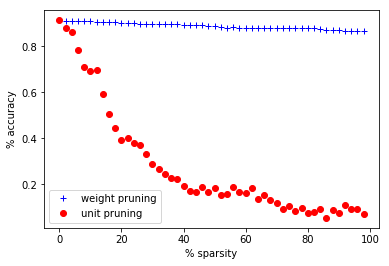

In [0]:
plt.plot(k,plt_var,'b+',label="weight pruning")
plt.plot(k, unit_prune_plot_var,'ro',label="unit pruning")
plt.xlabel("% sparsity")
plt.ylabel("% accuracy")
plt.legend()
plt.show()


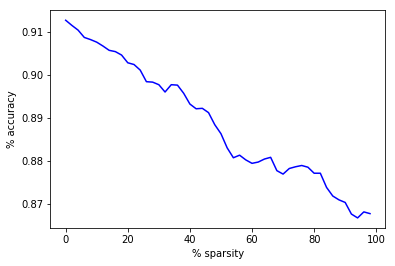

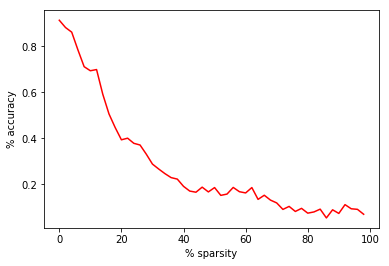

In [0]:
plt.plot(k,plt_var,'b')
plt.xlabel("% sparsity")
plt.ylabel("% accuracy")
plt.show()
plt.plot(k,unit_prune_plot_var,'r')
plt.xlabel("% sparsity")
plt.ylabel("% accuracy")
plt.show()

In [0]:
#dic1 = {k:unit_prune_plot_var}
#dic2 = {k:plt_var}


pd.DataFrame({'K% Sparsity':k,'WP acc.':plt_var,'UP acc.':unit_prune_plot_var})

,K% Sparsity,WP acc.,UP acc.
0,0,0.9127,0.9127
1,2,0.9115,0.8811
2,4,0.9104,0.8609
3,6,0.9087,0.7838
4,8,0.9082,0.7109
5,10,0.9076,0.6932
6,12,0.9067,0.6984
7,14,0.9057,0.5912
8,16,0.9054,0.5055
9,18,0.9046,0.4462


In [0]:
"""def NN_model(data):
  hidden1 = {'weights':tf.Variable(tf.random_normal([784,nodes_h1])),'biases':tf.Variable(tf.random_normal([nodes_h1]))}
  hidden2 = {'weights':tf.Variable(tf.random_normal([nodes_h1,nodes_h2])),'biases':tf.Variable(tf.random_normal([nodes_h2]))}
  hidden3 = {'weights':tf.Variable(tf.random_normal([nodes_h2,nodes_h3])),'biases':tf.Variable(tf.random_normal([nodes_h3]))}
  hidden4 = {'weights':tf.Variable(tf.random_normal([nodes_h3,nodes_h4])),'biases':tf.Variable(tf.random_normal([nodes_h4]))}
  output = {'weights':tf.Variable(tf.random_normal([nodes_h4,num_classes])),'biases':tf.Variable(tf.random_normal([num_classes]))}
   
  layer1 = tf.add(tf.matmul(data,hidden1['weights']),hidden1['biases'])
  layer1 = tf.nn.relu(layer1)
  
  layer2 = tf.add(tf.matmul(layer1,hidden2['weights']),hidden2['biases'])
  layer2 = tf.nn.relu(layer2)
  
  layer3 = tf.add(tf.matmul(layer2,hidden3['weights']),hidden3['biases'])
  layer3 = tf.nn.relu(layer3)
 
  layer4 = tf.add(tf.matmul(layer3,hidden4['weights']),hidden4['biases'])
  layer4 = tf.nn.relu(layer4)
   
  
  output_layer = tf.matmul(layer4,output['weights']),output['biases']

  return output_layer
"""  

"def NN_model(data):\n  hidden1 = {'weights':tf.Variable(tf.random_normal([784,nodes_h1])),'biases':tf.Variable(tf.random_normal([nodes_h1]))}\n  hidden2 = {'weights':tf.Variable(tf.random_normal([nodes_h1,nodes_h2])),'biases':tf.Variable(tf.random_normal([nodes_h2]))}\n  hidden3 = {'weights':tf.Variable(tf.random_normal([nodes_h2,nodes_h3])),'biases':tf.Variable(tf.random_normal([nodes_h3]))}\n  hidden4 = {'weights':tf.Variable(tf.random_normal([nodes_h3,nodes_h4])),'biases':tf.Variable(tf.random_normal([nodes_h4]))}\n  output = {'weights':tf.Variable(tf.random_normal([nodes_h4,num_classes])),'biases':tf.Variable(tf.random_normal([num_classes]))}\n   \n  layer1 = tf.add(tf.matmul(data,hidden1['weights']),hidden1['biases'])\n  layer1 = tf.nn.relu(layer1)\n  \n  layer2 = tf.add(tf.matmul(layer1,hidden2['weights']),hidden2['biases'])\n  layer2 = tf.nn.relu(layer2)\n  \n  layer3 = tf.add(tf.matmul(layer2,hidden3['weights']),hidden3['biases'])\n  layer3 = tf.nn.relu(layer3)\n \n  layer4 = 

In [0]:
"""def train(x):
  predict = NN_model(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predict,labels=y))
  
  optimizer = tf.train.AdamOptimizer().minimize(cost)
  
  with tf.Session as sess:
      sess.run(tf.initialize_all_variables())
      
      for i in epoch:
        loss =0
        for _ in range(int(mnist.train.num_examples/batch_size)):
          a,b= mnist.train.next_batch(batch_size)
          _,c = sess.run([optimizer,cost],feed_dict={x:a, y:b})
          loss += c
        print('Epoch',i,'completed out of',epoch,'loss:',loss)
        
        correct = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
        
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
        
"""       

"def train(x):\n  predict = NN_model(x)\n  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predict,labels=y))\n  \n  optimizer = tf.train.AdamOptimizer().minimize(cost)\n  \n  with tf.Session as sess:\n      sess.run(tf.initialize_all_variables())\n      \n      for i in epoch:\n        loss =0\n        for _ in range(int(mnist.train.num_examples/batch_size)):\n          a,b= mnist.train.next_batch(batch_size)\n          _,c = sess.run([optimizer,cost],feed_dict={x:a, y:b})\n          loss += c\n        print('Epoch',i,'completed out of',epoch,'loss:',loss)\n        \n        correct = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))\n        \n        accuracy = tf.reduce_mean(tf.cast(correct,'float'))\n        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))\n        \n"